   # DATA SCIENCE CAPSTONE 
### West Nile Virus in Chicago

The West Nile Virus, a single stranded RNA virus, is known to spread amongst mosquitos.  According to the CDC, It is the leading cause of mosquito-borne disease in the United States. Though fatality is minimal, 1 of 5 people face its symptoms each year. 

Chicago Public Health Workers each year set traps around the city to collect mosquitos and test whether the virus is present in them or not. From 2011-2013, the city of Chicago sprayed its mosquitos so that the number of mosquitos and the virus presence could decrease. The goal is to determine the percentage of its mosquitos containing the West Nile Virus for a given time and location and whether there is a correlation between date, temperature and virus presence. 


In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [2]:
#open the file 
df = pd.read_csv('train.csv')
df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [3]:
#get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [4]:
#find dataset shape
df.shape

(10506, 12)

In [5]:
#determine number of missing values in each column
null_values = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
null_values.columns=['Count', '%']
null_values.sort_values(by='Count')
null_values

,Count,%
Date,0,0.0
Address,0,0.0
Species,0,0.0
Block,0,0.0
Street,0,0.0
Trap,0,0.0
AddressNumberAndStreet,0,0.0
Latitude,0,0.0
Longitude,0,0.0
AddressAccuracy,0,0.0


No null or missing values are present in this data

#### Analyze the dates in which mosquitoes were collected

In [6]:
df['Date'].unique()
np.count_nonzero(df['Date'].unique())

95

In [7]:
df_date = df['Date'].value_counts()
df_date

2007-08-01    551
2007-08-15    276
2013-08-01    186
2007-08-24    186
2007-08-21    186
             ... 
2007-10-09     26
2007-05-29     25
2007-09-25     23
2009-06-03     14
2007-08-03      5
Name: Date, Length: 95, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='Count'>

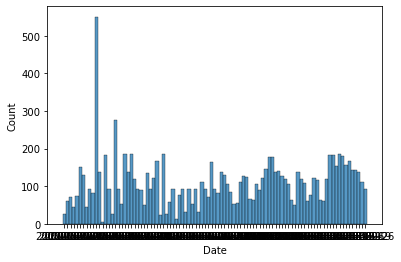

In [8]:
sns.histplot(data = df_date, x=df['Date'], bins=100) 
# A high number of collections were done on  August 1, 2007

#### Analyze locations of where mosquitoes were trapped 

In [9]:
df['Block'].unique()

array([41, 62, 79, 15, 25, 11, 21, 22, 17, 53, 65, 75, 89, 91, 36, 72, 38,
       49, 58, 50, 14, 10, 42, 40, 43, 28, 18, 70, 35, 93, 37, 45, 46, 60,
       61, 27, 68, 30, 96, 64, 12, 20, 33, 52, 67, 73, 39, 47, 55, 71, 77,
       63, 13, 81, 24, 80, 82, 98, 66, 48, 51, 90, 29, 34])

In [10]:
np.count_nonzero(df['Block'].unique())

64

In [11]:
np.count_nonzero(df['Street'].unique())

128

In [12]:
np.count_nonzero(df['Address'].unique())

138

In [13]:
df['AddressAccuracy'].unique() # On a scaled of 0-9 where 9 is the most accurate and 0 is the least accurate

array([9, 8, 5, 3])

#### Analyze the prescence of the West Nile Virus
1 is denoted as the virus present and 0 is denoted as the virus is not present

In [14]:
df['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

In [15]:
#calcualte the percentage of virus
(551/10506)*100

5.244622120692937

About 5.2% of the collected mosquitos contain the virus

<AxesSubplot:xlabel='WnvPresent', ylabel='count'>

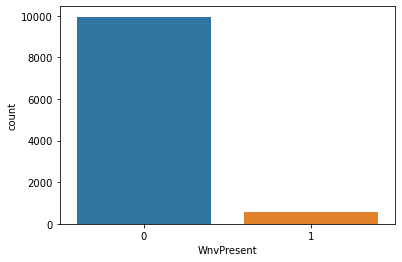

In [16]:
sns.countplot(x=df['WnvPresent'])

In [17]:
data_mos_count = df['NumMosquitos'].value_counts()

<AxesSubplot:xlabel='NumMosquitos', ylabel='Count'>

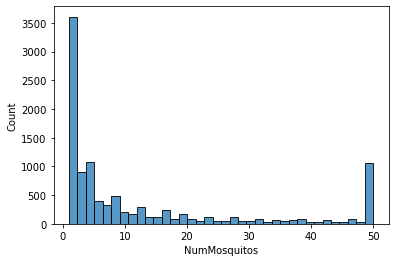

In [18]:
sns.histplot(data = data_mos_count, x=df['NumMosquitos'])

#### Analyze the different species of the West Nile Virus

In [19]:
df['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [20]:
df[(df['Species'] == 'CULEX PIPIENS/RESTUANS') & (df['NumMosquitos'] == 1)].count()
773/4752*100

16.266835016835017

In [21]:
df[(df['Species'] == 'CULEX RESTUANS') & (df['NumMosquitos'] == 1)].count()
770/2740*100

28.102189781021895

In [22]:
df[(df['Species'] == 'CULEX PIPIENS') & (df['NumMosquitos'] == 1)].count()
545/2699*100

20.192663949610967

In [23]:
df[(df['Species'] == 'CULEX TERRITANS') & (df['NumMosquitos'] == 1)].count()
153/222*100

68.91891891891892

In [24]:
df[(df['Species'] == 'CULEX SALINARIUS') & (df['NumMosquitos'] == 1)].count()
61/86*100

70.93023255813954

In [25]:
df[(df['Species'] == 'CULEX TARSALIS') & (df['NumMosquitos'] == 1)].count()
5/6*100

83.33333333333334

In [26]:
df[(df['Species'] == 'CULEX ERRATICUS') & (df['NumMosquitos'] == 1)].count()
0/1*100

0.0

<AxesSubplot:xlabel='count', ylabel='Species'>

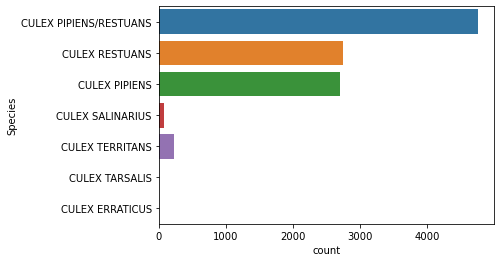

In [27]:
sns.countplot(y=df['Species'])

In [28]:
wnv_df = pd.DataFrame(data=df, columns= ['Date','Species','NumMosquitos','WnvPresent'])
wnv_df

,Date,Species,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,1,0
1,2007-05-29,CULEX RESTUANS,1,0
2,2007-05-29,CULEX RESTUANS,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,1,0
4,2007-05-29,CULEX RESTUANS,4,0
...,...,...,...,...
10501,2013-09-26,CULEX PIPIENS/RESTUANS,6,1
10502,2013-09-26,CULEX PIPIENS/RESTUANS,5,0
10503,2013-09-26,CULEX PIPIENS/RESTUANS,1,0
10504,2013-09-26,CULEX PIPIENS/RESTUANS,5,0


#### Look into the Weather Data

In [29]:
weather = pd.read_csv('weather.csv')
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [30]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [31]:
weather.shape

(2944, 22)

In [32]:
weather['PrecipTotal'].value_counts()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
        ... 
1.35       1
1.49       1
0.96       1
1.38       1
1.19       1
Name: PrecipTotal, Length: 168, dtype: int64

In [33]:
weather['PrecipTotal'].value_counts()  
weather['PrecipTotal'] = weather['PrecipTotal'].replace({'M':0.00,'  T':0.00}) 
weather['PrecipTotal'] = weather['PrecipTotal'].astype(float)
weather['PrecipTotal'].unique()

array([0.  , 0.13, 0.02, 0.38, 0.6 , 0.14, 0.07, 0.11, 0.09, 1.01, 0.28,
       0.04, 0.08, 0.01, 0.53, 0.19, 0.21, 0.32, 0.39, 0.31, 0.42, 0.27,
       0.16, 0.58, 0.93, 0.05, 0.34, 0.15, 0.35, 0.4 , 0.66, 0.3 , 0.24,
       0.43, 1.55, 0.92, 0.89, 0.17, 0.03, 1.43, 0.97, 0.26, 1.31, 0.06,
       0.46, 0.29, 0.23, 0.41, 0.45, 0.83, 1.33, 0.91, 0.48, 0.37, 0.88,
       2.35, 1.96, 0.2 , 0.25, 0.18, 0.67, 0.36, 0.33, 1.28, 0.74, 0.76,
       0.71, 0.95, 1.46, 0.12, 0.52, 0.64, 0.22, 1.24, 0.72, 0.73, 0.65,
       1.61, 1.22, 0.5 , 1.05, 2.43, 0.59, 2.9 , 2.68, 1.23, 0.62, 6.64,
       3.07, 1.44, 1.75, 0.82, 0.8 , 0.86, 0.63, 0.55, 1.03, 0.7 , 1.73,
       1.38, 0.44, 1.14, 1.07, 3.97, 0.87, 0.78, 1.12, 0.68, 0.1 , 0.61,
       0.54, 1.19, 0.75, 0.84, 1.29, 0.81, 1.15, 1.49, 1.57, 1.02, 1.3 ,
       0.51, 0.85, 0.79, 0.77, 2.79, 3.15, 3.64, 4.73, 1.6 , 0.57, 2.24,
       1.9 , 1.06, 1.88, 0.69, 2.17, 6.86, 0.49, 1.11, 1.21, 0.9 , 1.34,
       0.47, 0.56, 3.66, 1.09, 1.25, 1.35, 2.2 , 1.

In [34]:
weather['Tavg'].value_counts()
weather['Tavg'] = weather['Tavg'].replace('M',67)
weather['Tavg'] = weather['Tavg'].astype(int)

In [35]:
weather['Tavg'].mean()

67.23913043478261

<AxesSubplot:xlabel='Date', ylabel='Tavg'>

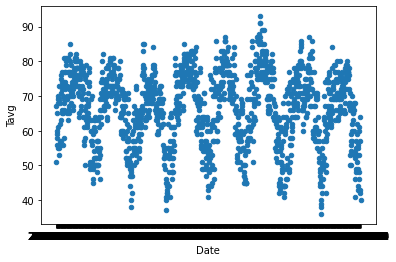

In [36]:
station_one = pd.DataFrame(weather[(weather['Station'] == 1)])
station_one.plot.scatter(x='Date', y='Tavg')

<AxesSubplot:xlabel='Date', ylabel='Tavg'>

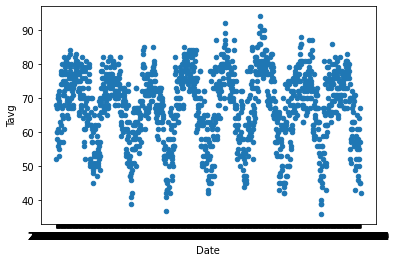

In [38]:
station_two = weather[(weather['Station'] == 2)]
station_two.plot.scatter(x='Date', y='Tavg')

Station 1 and 2 are the Aiport Locations in Chicago. Station 1 is Chicago O'Hare International Airport and Station 2 is Chicago Midway International Airport. Both stations seem to have similar tempertaure and changes. Therefore, analyzing one station can generalize the collections at the two airports. 

In [39]:
weather['Date'].value_counts()

2014-06-18    2
2011-07-27    2
2007-08-14    2
2009-06-23    2
2014-09-10    2
             ..
2007-08-17    2
2011-06-11    2
2008-08-09    2
2008-07-25    2
2013-09-26    2
Name: Date, Length: 1472, dtype: int64

In [40]:
df_virus = df[df['NumMosquitos'] == 1]
virus_dates = df_virus['Date'].unique()

In [41]:
weather_df = pd.DataFrame(data=weather,columns=['Station','Date','Tmax','Tmin','Tavg','PrecipTotal'])
weather_df= pd.DataFrame(weather_df[(weather_df['Station'] == 1)])
weather_df

,Station,Date,Tmax,Tmin,Tavg,PrecipTotal
0,1,2007-05-01,83,50,67,0.00
2,1,2007-05-02,59,42,51,0.00
4,1,2007-05-03,66,46,56,0.00
6,1,2007-05-04,66,49,58,0.00
8,1,2007-05-05,66,53,60,0.00
...,...,...,...,...,...,...
2934,1,2014-10-27,77,51,64,0.00
2936,1,2014-10-28,68,45,57,0.00
2938,1,2014-10-29,49,36,43,0.00
2940,1,2014-10-30,51,32,42,0.00


### Pre-proccessing 
Combine the dataframes

In [42]:
df_final = wnv_df.merge(weather_df, on='Date')
df_final

,Date,Species,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal
0,2007-05-29,CULEX PIPIENS/RESTUANS,1,0,1,88,60,74,0.0
1,2007-05-29,CULEX RESTUANS,1,0,1,88,60,74,0.0
2,2007-05-29,CULEX RESTUANS,1,0,1,88,60,74,0.0
3,2007-05-29,CULEX PIPIENS/RESTUANS,1,0,1,88,60,74,0.0
4,2007-05-29,CULEX RESTUANS,4,0,1,88,60,74,0.0
...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,CULEX PIPIENS/RESTUANS,6,1,1,75,50,63,0.0
10502,2013-09-26,CULEX PIPIENS/RESTUANS,5,0,1,75,50,63,0.0
10503,2013-09-26,CULEX PIPIENS/RESTUANS,1,0,1,75,50,63,0.0
10504,2013-09-26,CULEX PIPIENS/RESTUANS,5,0,1,75,50,63,0.0


In [43]:
df_final_wnv_present = df_final[df_final['WnvPresent'] == 1]
print(df_final_wnv_present['Tavg'].mean())
df_final_wnv_notpresent = df_final[df_final['WnvPresent'] == 0]
print(df_final_wnv_notpresent['Tavg'].mean())

74.64246823956442
72.41356102461074


In [44]:
df_final[df_final['Tavg'] > 75]

,Date,Species,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal
85,2007-06-26,CULEX PIPIENS/RESTUANS,1,0,1,92,70,81,0.16
86,2007-06-26,CULEX RESTUANS,4,0,1,92,70,81,0.16
87,2007-06-26,CULEX SALINARIUS,1,0,1,92,70,81,0.16
88,2007-06-26,CULEX PIPIENS/RESTUANS,1,0,1,92,70,81,0.16
89,2007-06-26,CULEX RESTUANS,4,0,1,92,70,81,0.16
...,...,...,...,...,...,...,...,...,...
10409,2013-09-19,CULEX PIPIENS,4,0,1,84,69,77,0.84
10410,2013-09-19,CULEX PIPIENS,21,0,1,84,69,77,0.84
10411,2013-09-19,CULEX PIPIENS,15,0,1,84,69,77,0.84
10412,2013-09-19,CULEX PIPIENS/RESTUANS,2,0,1,84,69,77,0.84


In [45]:
#One Hot Encoding on the Species Column 
df_final = pd.get_dummies(df_final, columns=['Species'], prefix='C')
df_final

,Date,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal,C_CULEX ERRATICUS,C_CULEX PIPIENS,C_CULEX PIPIENS/RESTUANS,C_CULEX RESTUANS,C_CULEX SALINARIUS,C_CULEX TARSALIS,C_CULEX TERRITANS
0,2007-05-29,1,0,1,88,60,74,0.0,0,0,1,0,0,0,0
1,2007-05-29,1,0,1,88,60,74,0.0,0,0,0,1,0,0,0
2,2007-05-29,1,0,1,88,60,74,0.0,0,0,0,1,0,0,0
3,2007-05-29,1,0,1,88,60,74,0.0,0,0,1,0,0,0,0
4,2007-05-29,4,0,1,88,60,74,0.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,6,1,1,75,50,63,0.0,0,0,1,0,0,0,0
10502,2013-09-26,5,0,1,75,50,63,0.0,0,0,1,0,0,0,0
10503,2013-09-26,1,0,1,75,50,63,0.0,0,0,1,0,0,0,0
10504,2013-09-26,5,0,1,75,50,63,0.0,0,0,1,0,0,0,0


In [46]:
df_final['Date']=pd.to_datetime(df_final['Date'],format='%Y-%m-%d', errors='coerce')
df_final['Date_Month']=df_final['Date'].apply(lambda x : x.month)
df_final['Date_Month'].value_counts()

8     3751
7     2606
9     2218
6     1571
10     276
5       84
Name: Date_Month, dtype: int64

In [47]:
df_final['Date_Year']=df_final['Date'].apply(lambda x : x.year)
df_final['Date_Year'].value_counts()

2007    3811
2013    2392
2009    2249
2011    2054
Name: Date_Year, dtype: int64

Majority of the collections were collected during the Summer time, between June-August. Other collections were taken later during the spring and early in the fall. No collections were done during the winter months.

In [48]:
df_final = df_final.drop(columns='Date')
df_final

,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal,C_CULEX ERRATICUS,C_CULEX PIPIENS,C_CULEX PIPIENS/RESTUANS,C_CULEX RESTUANS,C_CULEX SALINARIUS,C_CULEX TARSALIS,C_CULEX TERRITANS,Date_Month,Date_Year
0,1,0,1,88,60,74,0.0,0,0,1,0,0,0,0,5,2007
1,1,0,1,88,60,74,0.0,0,0,0,1,0,0,0,5,2007
2,1,0,1,88,60,74,0.0,0,0,0,1,0,0,0,5,2007
3,1,0,1,88,60,74,0.0,0,0,1,0,0,0,0,5,2007
4,4,0,1,88,60,74,0.0,0,0,0,1,0,0,0,5,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,6,1,1,75,50,63,0.0,0,0,1,0,0,0,0,9,2013
10502,5,0,1,75,50,63,0.0,0,0,1,0,0,0,0,9,2013
10503,1,0,1,75,50,63,0.0,0,0,1,0,0,0,0,9,2013
10504,5,0,1,75,50,63,0.0,0,0,1,0,0,0,0,9,2013


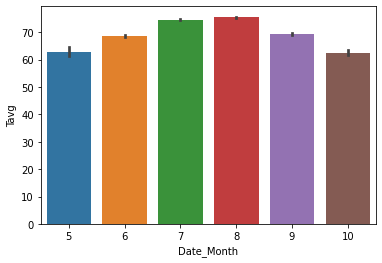

In [49]:
sns.barplot(x='Date_Month',y='Tavg',data=df_final)
plt.show()

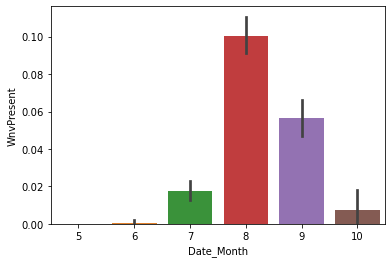

In [50]:
sns.barplot(x='Date_Month',y='WnvPresent',data=df_final)
plt.show()

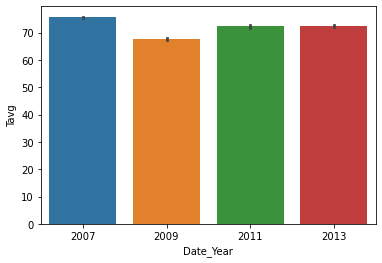

In [51]:
sns.barplot(x='Date_Year',y='Tavg',data=df_final)
plt.show()

In [52]:
df_final.dtypes
#df_final['Date_Month'] = df_final['Date_Month'].astype(int)
#df_final['PrecipTotal'] = df_final['PrecipTotal'].astype(int)

NumMosquitos                  int64
WnvPresent                    int64
Station                       int64
Tmax                          int64
Tmin                          int64
Tavg                          int64
PrecipTotal                 float64
C_CULEX ERRATICUS             uint8
C_CULEX PIPIENS               uint8
C_CULEX PIPIENS/RESTUANS      uint8
C_CULEX RESTUANS              uint8
C_CULEX SALINARIUS            uint8
C_CULEX TARSALIS              uint8
C_CULEX TERRITANS             uint8
Date_Month                    int64
Date_Year                     int64
dtype: object

In [53]:
df_final.describe()

,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal,C_CULEX ERRATICUS,C_CULEX PIPIENS,C_CULEX PIPIENS/RESTUANS,C_CULEX RESTUANS,C_CULEX SALINARIUS,C_CULEX TARSALIS,C_CULEX TERRITANS,Date_Month,Date_Year
count,10506.000000,10506.000000,10506.0,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,12.853512,0.052446,1.0,81.847992,62.716067,72.530459,0.180601,0.000095,0.256901,0.452313,0.260803,0.008186,0.000571,0.021131,7.692557,2009.576242
std,16.133816,0.222936,0.0,8.278380,7.677123,7.523979,0.472513,0.009756,0.436945,0.497744,0.439094,0.090109,0.023892,0.143827,1.067675,2.354645
min,1.000000,0.000000,1.0,57.000000,41.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
25%,2.000000,0.000000,1.0,78.000000,58.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2007.000000
50%,5.000000,0.000000,1.0,83.000000,64.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
75%,17.000000,0.000000,1.0,88.000000,69.000000,78.000000,0.160000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,2011.000000
max,50.000000,1.000000,1.0,96.000000,76.000000,84.000000,3.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2013.000000


Random under-sampling:
1    551
0    551
Name: WnvPresent, dtype: int64


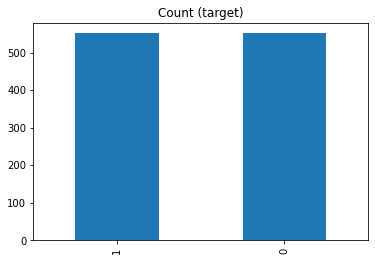

In [54]:
#Undersampling Data

X_sample, y_sample = df_final.WnvPresent.value_counts()

# Divide by class
df_X = df_final[df_final['WnvPresent'] == 0]
df_y = df_final[df_final['WnvPresent'] == 1]

df_X_under = df_X.sample(y_sample)
df_X_under.reset_index(drop=True, inplace=True)
df_y.reset_index(drop=True, inplace=True)
df_test_under = pd.concat([df_X_under, df_y], axis=0)

print('Random under-sampling:')
print(df_test_under.WnvPresent.value_counts())

df_test_under.WnvPresent.value_counts().plot(kind='bar', title='Count (target)');


In [55]:
df_test_under

,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal,C_CULEX ERRATICUS,C_CULEX PIPIENS,C_CULEX PIPIENS/RESTUANS,C_CULEX RESTUANS,C_CULEX SALINARIUS,C_CULEX TARSALIS,C_CULEX TERRITANS,Date_Month,Date_Year
0,9,0,1,74,64,69,0.33,0,0,1,0,0,0,0,8,2009
1,2,0,1,78,65,72,0.00,0,0,1,0,0,0,0,8,2013
2,4,0,1,78,68,73,0.23,0,0,0,1,0,0,0,8,2013
3,1,0,1,77,62,70,0.00,0,0,1,0,0,0,0,7,2007
4,1,0,1,80,71,76,0.23,0,0,1,0,0,0,0,8,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,27,1,1,84,69,77,0.84,0,0,1,0,0,0,0,9,2013
547,3,1,1,75,50,63,0.00,0,1,0,0,0,0,0,9,2013
548,4,1,1,75,50,63,0.00,0,0,1,0,0,0,0,9,2013
549,39,1,1,75,50,63,0.00,0,0,1,0,0,0,0,9,2013


In [56]:
df_test_under.describe()

,NumMosquitos,WnvPresent,Station,Tmax,Tmin,Tavg,PrecipTotal,C_CULEX ERRATICUS,C_CULEX PIPIENS,C_CULEX PIPIENS/RESTUANS,C_CULEX RESTUANS,C_CULEX SALINARIUS,C_CULEX TARSALIS,C_CULEX TERRITANS,Date_Month,Date_Year
count,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.000000,1102.000000,1102.0,1102.000000,1102.000000,1102.000000
mean,19.511797,0.500000,1.0,82.551724,63.982759,73.521779,0.156407,0.0,0.341198,0.464610,0.177858,0.005445,0.0,0.010889,7.892922,2009.753176
std,17.984536,0.500227,0.0,7.604109,7.092273,6.806724,0.360188,0.0,0.474327,0.498972,0.382567,0.073620,0.0,0.103829,0.880387,2.587412
min,1.000000,0.000000,1.0,57.000000,41.000000,50.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,2007.000000
25%,3.000000,0.000000,1.0,79.000000,60.000000,71.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,7.000000,2007.000000
50%,13.000000,0.500000,1.0,83.000000,66.000000,75.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,2009.000000
75%,35.750000,1.000000,1.0,88.000000,69.000000,78.000000,0.230000,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,8.000000,2013.000000
max,50.000000,1.000000,1.0,96.000000,76.000000,84.000000,3.970000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,10.000000,2013.000000


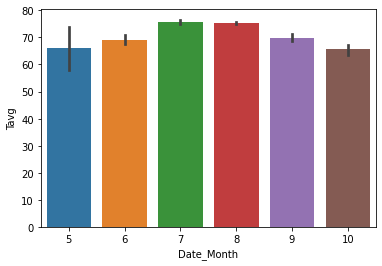

In [57]:
sns.barplot(x='Date_Month',y='Tavg',data=df_test_under)
plt.show()

### Modeling 


In [58]:
from sklearn.model_selection import train_test_split

X = df_test_under.drop('WnvPresent', axis=1)
y = df_test_under['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 84 to 510
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NumMosquitos              826 non-null    int64  
 1   Station                   826 non-null    int64  
 2   Tmax                      826 non-null    int64  
 3   Tmin                      826 non-null    int64  
 4   Tavg                      826 non-null    int64  
 5   PrecipTotal               826 non-null    float64
 6   C_CULEX ERRATICUS         826 non-null    uint8  
 7   C_CULEX PIPIENS           826 non-null    uint8  
 8   C_CULEX PIPIENS/RESTUANS  826 non-null    uint8  
 9   C_CULEX RESTUANS          826 non-null    uint8  
 10  C_CULEX SALINARIUS        826 non-null    uint8  
 11  C_CULEX TARSALIS          826 non-null    uint8  
 12  C_CULEX TERRITANS         826 non-null    uint8  
 13  Date_Month                826 non-null    int64  
 14  Date_Year

In [60]:
import collections
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import re
import string
import warnings

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    #print("justmiss", justmiss)
    #print("notmiss", notmiss)
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            #print("I am here 1",r, n,len(d2))
            n = n - 1 
            
        except Exception as e:
            n = n - 1
            #print("I am here e",n)

    if len(d2) == 1:
        #print("I am second step ",r, n)
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        #print(justmiss.count().Y)
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    print(np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT))
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    #print("hi",d3.IV )
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                #print("Number and unique value greater than 2")
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("I am here 2")
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [61]:
final_iv, IV = data_vars(X_train, y_train)

NumMosquitos
0   -1.571019
1    0.108415
2    0.674284
3    0.935499
dtype: float64
Station
Tmax
0   -0.026981
1   -0.014608
2    0.054652
dtype: float64
Tmin
0   -0.096986
1    0.112959
dtype: float64
Tavg
0   -0.139262
1    0.156907
dtype: float64
PrecipTotal
0    0.031121
1   -1.032430
dtype: float64
C_CULEX ERRATICUS
C_CULEX PIPIENS
C_CULEX PIPIENS/RESTUANS
C_CULEX RESTUANS
C_CULEX SALINARIUS


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C_CULEX TARSALIS
C_CULEX TERRITANS
Date_Month
0   -0.002746
1    0.009584
dtype: float64
Date_Year
0   -0.238696
1    0.275026
dtype: float64


In [62]:
#Logsitic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[[105  40]
 [ 32  99]]
0.7391304347826086
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       145
           1       0.71      0.76      0.73       131

    accuracy                           0.74       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.74      0.74      0.74       276



<AxesSubplot:>

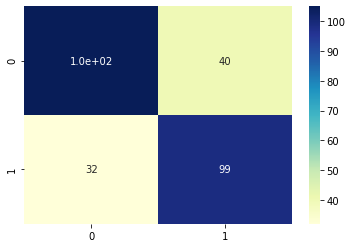

In [63]:
predictions_logreg=logreg.predict(X_test)
print(confusion_matrix(y_test, predictions_logreg))
print(accuracy_score(y_test, predictions_logreg))
print(classification_report(y_test, predictions_logreg))

sns.heatmap(confusion_matrix(y_test, predictions_logreg),annot=True,cmap ="YlGnBu")

In [64]:
#Random Forrest Classifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = rfc.fit(X_train, y_train)
predictions_rfc = model_res.predict(X_test)

[[116  29]
 [ 37  94]]
0.7608695652173914
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       145
           1       0.76      0.72      0.74       131

    accuracy                           0.76       276
   macro avg       0.76      0.76      0.76       276
weighted avg       0.76      0.76      0.76       276



<AxesSubplot:>

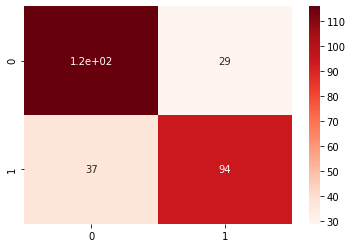

In [65]:
print(confusion_matrix(y_test, predictions_rfc))
print(accuracy_score(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

sns.heatmap(confusion_matrix(y_test, predictions_rfc),annot=True,cmap ="Reds")

[[112  33]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       145
           1       0.77      0.86      0.82       131

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



<AxesSubplot:>

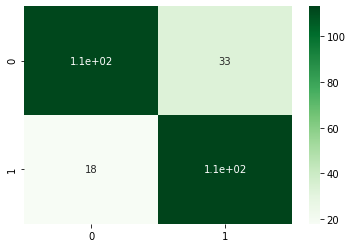

In [66]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 20, random_state = 0)
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)

print(confusion_matrix(y_test, predictions_gb))
print(classification_report(y_test, predictions_gb))

sns.heatmap(confusion_matrix(y_test, predictions_gb),annot=True,cmap ="Greens")

In [67]:
#Accuracy Scores of the different test
print("Logistic Regression: %.2f%%" % (accuracy_score(y_test, predictions_logreg) * 100.0))
print("Random Forrest Classifier: %.2f%%" % (accuracy_score(y_test, predictions_rfc) * 100.0))
print("Gradient Boosting: %.2f%%" % (accuracy_score(y_test, predictions_gb) * 100.0))

Logistic Regression: 73.91%
Random Forrest Classifier: 76.09%
Gradient Boosting: 81.52%


In [68]:
#AUC Score for the different test 

from sklearn.metrics import roc_auc_score
print("Logistic Regression: %.2f%%" % (roc_auc_score(y_test, predictions_logreg) * 100.0))
print("Random Forrest Classifier: %.2f%%" % (roc_auc_score(y_test, predictions_rfc) * 100.0))
print("Gradient Boosting: %.2f%%" % (roc_auc_score(y_test, predictions_gb) * 100.0))

Logistic Regression: 73.99%
Random Forrest Classifier: 75.88%
Gradient Boosting: 81.75%


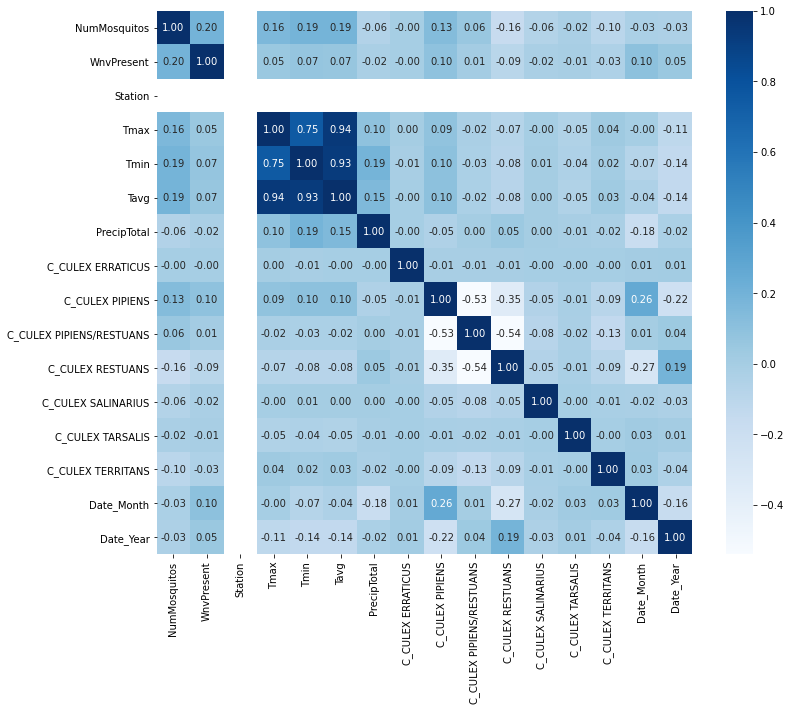

In [69]:
#Correlation plot of the Original Data
plt.figure(figsize=(12,10))
sns.heatmap(df_final.corr(),annot=True,fmt=".2f",cmap ='Blues')
plt.show()

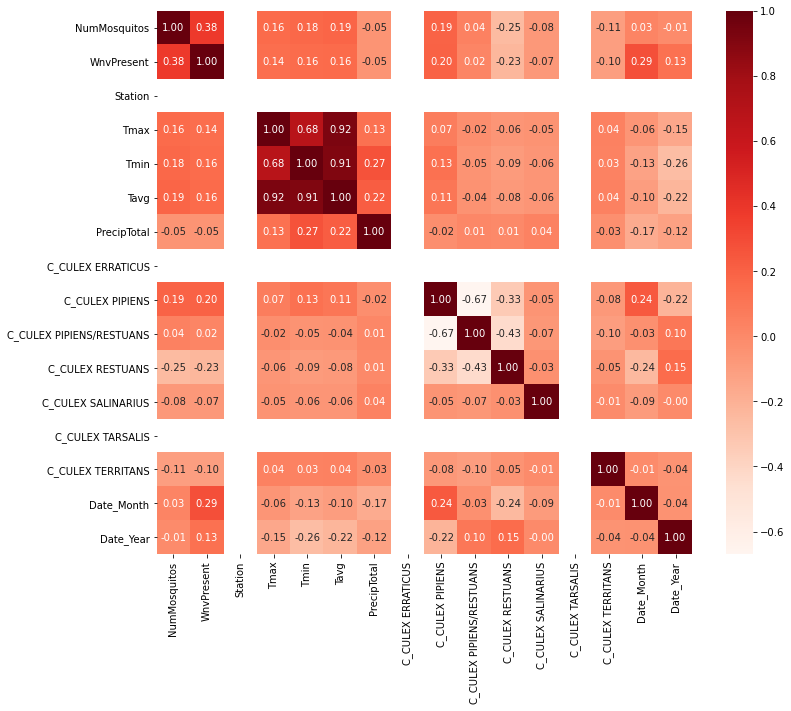

In [70]:
#Correlation plot of the Resampled Data
plt.figure(figsize=(12,10))
sns.heatmap(df_test_under.corr(),annot=True,fmt=".2f",cmap ='Reds')
plt.show()

In [71]:
#features = list(IV[(IV['IV'] >= 0.02) & (IV['IV'] <= 0.8)]['VAR_NAME'])
features = list(IV[(IV['IV'] >= 0.02) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(826, 5)

,C_CULEX PIPIENS,C_CULEX RESTUANS,Date_Year,PrecipTotal,Tavg
84,0,1,2007,0.00,81
542,1,0,2013,0.84,77
483,0,1,2009,0.00,64
125,0,0,2013,0.00,72
550,0,1,2009,0.00,70


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Removing Tavg with VIF of 131.141319
Iteration # 2
Complete


In [73]:
#installing shap
!pip install shap

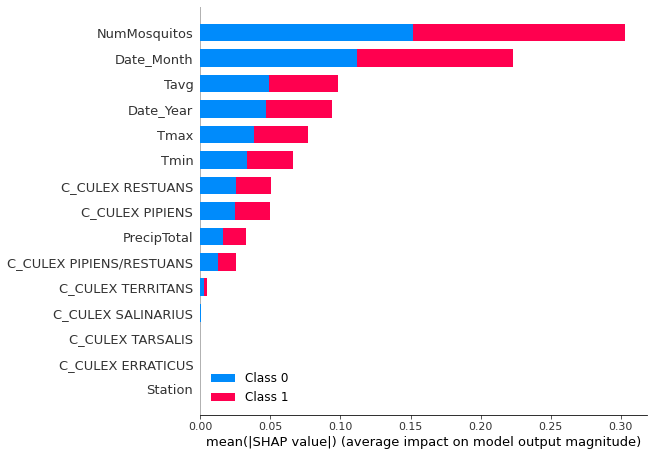

In [74]:
#Shap Analysis
import shap
shap_values = shap.TreeExplainer(rfc).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [76]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':np.arange(1,150),'max_depth': [9, 10, 11]}
rfc = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
rfc_cv= GridSearchCV(rfc,param_grid=param_grid,cv=10)
rfc_cv.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             param_grid={'max_depth': [9, 10, 11],
                         'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149

In [77]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.5945864045864047
Best Parameters: {'max_depth': 9, 'n_estimators': 51}
